# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from panel.interact import interact
from pathlib import Path
from dotenv import load_dotenv  

In [2]:
# Read the Mapbox API key
load_dotenv("")
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [3]:
def clean_vars_obser(df):
    """clean_vars_obser
        Used to obtain the number of variables and observations within a data frame
        and replace spaces in the variables with underscores.    
    """
    n_rows, n_cols = df.shape
    df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('/','_').str.replace('-','_').str.replace('%','pct')
    cols = [] 
    cols = df.columns
    print('Cleaned columns names with unique flags:\n')
    for c in cols:
        print(f'New Column name: {c}')
        print(f'  Unique Column: {df[c].is_unique}')
        print(f'  Count of Distinct Values: {df[c].nunique()}')
        print(f'  Data Type: {df[c].dtypes}')
        print(f'  Total Null Values: {df[c].isnull().sum()}')
        print(f'  Total NA Values: {df[c].isna().sum()}\n')
    #return cols
    print('Variables and Observation Totals: ' + 'Number of Variables: ' + str(n_cols) + ', Number of Observation: ' + str(n_rows) + '\n')
    

In [4]:
def csv_to_df_imports(file_path, index_col_nm=''):
    """import CSVs"""
        
    file_path = Path(file_path)
    if index_col_nm=='' or index_col_nm is None:
        df_name = pd.read_csv(file_path)
    else:
        #indexCol_nm = input('Enter column to use as index ')
        df_name = pd.read_csv(file_path, index_col=index_col_nm)
        
    return df_name

In [5]:
# Import the necessary CSVs to Pandas DataFrames
#census
sfo_data = csv_to_df_imports("Data/sfo_neighborhoods_census_data.csv", index_col_nm='year')
clean_vars_obser(sfo_data)
sfo_data.head()

Cleaned columns names with unique flags:

New Column name: neighborhood
  Unique Column: False
  Count of Distinct Values: 73
  Data Type: object
  Total Null Values: 0
  Total NA Values: 0

New Column name: sale_price_sqr_foot
  Unique Column: False
  Count of Distinct Values: 392
  Data Type: float64
  Total Null Values: 5
  Total NA Values: 5

New Column name: housing_units
  Unique Column: False
  Count of Distinct Values: 7
  Data Type: int64
  Total Null Values: 0
  Total NA Values: 0

New Column name: gross_rent
  Unique Column: False
  Count of Distinct Values: 7
  Data Type: int64
  Total Null Values: 0
  Total NA Values: 0

Variables and Observation Totals: Number of Variables: 4, Number of Observation: 397



neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

In [6]:
#coordinates
sfo_coordinates_data = csv_to_df_imports("Data/neighborhoods_coordinates.csv")
clean_vars_obser(sfo_coordinates_data)
sfo_coordinates_data.head()

Cleaned columns names with unique flags:

New Column name: neighborhood
  Unique Column: True
  Count of Distinct Values: 73
  Data Type: object
  Total Null Values: 0
  Total NA Values: 0

New Column name: lat
  Unique Column: False
  Count of Distinct Values: 40
  Data Type: float64
  Total Null Values: 0
  Total NA Values: 0

New Column name: lon
  Unique Column: False
  Count of Distinct Values: 41
  Data Type: float64
  Total Null Values: 0
  Total NA Values: 0

Variables and Observation Totals: Number of Variables: 3, Number of Observation: 73



neighborhood        lat         lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

In [7]:
df_mean_neighborhood = sfo_data.groupby(['neighborhood']).mean().reset_index()
df_mean_neighborhood.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [8]:
df_top_10_expensive_neighborhoods = sfo_data.groupby(["neighborhood"]).mean().sort_values(['sale_price_sqr_foot'], ascending=[False]).head(10).reset_index()
df_top_10_expensive_neighborhoods

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000
5         Telegraph Hill           676.506578      378401.00  2817.285714
6       Presidio Heights           675.350212      378401.00  2817.285714
7             Cow Hollow           665.964042      378401.00  2817.285714
8           Potrero Hill           662.013613      378401.00  2817.285714
9            South Beach           650.124479      375805.00  2099.000000

In [9]:
df_mean_neighborhood_w_location = pd.merge(df_mean_neighborhood, sfo_coordinates_data, on="neighborhood")
df_mean_neighborhood_w_location.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent  \
0      Alamo Square           366.020712       378401.0  2817.285714   
1        Anza Vista           373.382198       379050.0  3031.833333   
2           Bayview           204.588623       376454.0  2318.400000   
3   Bayview Heights           590.792839       382295.0  3739.000000   
4  Buena Vista Park           452.680591       378076.5  2698.833333   

         lat         lon  
0  37.791012 -122.402100  
1  37.779598 -122.443451  
2  37.734670 -122.401060  
3  37.728740 -122.410980  
4  37.768160 -122.439330

In [10]:
df_expensive_neighborhoods_per_year = df_mean_neighborhood[df_mean_neighborhood["neighborhood"].isin(df_top_10_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
10       Cow Hollow           665.964042      378401.00  2817.285714
36   Merced Heights           788.844818      380348.00  3414.000000
38    Miraloma Park           779.810842      375967.25  2155.250000
51  Pacific Heights           689.555817      378401.00  2817.285714
56     Potrero Hill           662.013613      378401.00  2817.285714

In [11]:
df_mean_neighborhood_year = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
df_mean_neighborhood_year

year                   neighborhood  sale_price_sqr_foot  housing_units  \
0    2010                   Alamo Square           291.182945         372560   
1    2010                     Anza Vista           267.932583         372560   
2    2010                        Bayview           170.098665         372560   
3    2010               Buena Vista Park           347.394919         372560   
4    2010               Central Richmond           319.027623         372560   
5    2010                 Central Sunset           418.172493         372560   
6    2010                 Corona Heights           369.359338         372560   
7    2010                     Cow Hollow           569.379968         372560   
8    2010                  Croker Amazon           165.645730         372560   
9    2010                Diamond Heights           456.930822         372560   
10   2010                      Downtown            241.804552         372560   
11   2010  Eureka Valley/Dolores Heights           403.118313         372560   
12   2010                      Excelsior           364.928336         372560   
13   2010       Financial District North           401.749967         372560   
14   2010       Financial District South           162.821210         372560   
15   2010                  Forest Knolls           209.049327         372560   
16   2010                      Glen Park           715.586438         372560   
17   2010            Golden Gate Heights           551.801119         372560   
18   2010                 Haight Ashbury           254.473779         372560   
19   2010                   Hayes Valley           272.284980         372560   
20   2010                  Hunters Point           170.624920         372560   
21   2010                     Ingleside            275.056686         372560   
22   2010                  Inner Mission           238.350020         372560   
23   2010                 Inner Parkside           199.702004         372560   
24   2010                 Inner Richmond           285.822358         372560   
25   2010                   Inner Sunset           275.769730         372560   
26   2010     Jordan Park/Laurel Heights           419.887812         372560   
27   2010            Lake --The Presidio           320.796910         372560   
28   2010                  Lone Mountain           398.458876         372560   
29   2010          Lower Pacific Heights           374.057636         372560   
..    ...                            ...                  ...            ...   
367  2016                  Inner Mission           647.770447         384242   
368  2016                 Inner Parkside           518.112650         384242   
369  2016                 Inner Richmond           403.311132         384242   
370  2016                   Inner Sunset           445.923828         384242   
371  2016     Jordan Park/Laurel Heights           704.566419         384242   
372  2016          Lower Pacific Heights           636.430770         384242   
373  2016                         Marina           431.944602         384242   
374  2016                 Merced Heights          1416.666667         384242   
375  2016                    Mission Bay           924.569116         384242   
376  2016                Mission Terrace           879.017013         384242   
377  2016                       Nob Hill           777.008315         384242   
378  2016                     Noe Valley           799.495651         384242   
379  2016                    North Beach           407.553322         384242   
380  2016                  Outer Mission            40.772625         384242   
381  2016                 Outer Parkside           732.720684         384242   
382  2016                Outer Richmond           1196.645437         384242   
383  2016                   Outer Sunset           510.576907         384242   
384  2016                Pacific Heights           996.389364         384242   
385  

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [12]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    df_housing_units = sfo_data["housing_units"].groupby(sfo_data.index).mean()
    
    fig_housing_units = plt.figure()
    plot_housing_units = df_housing_units.plot.bar(title = "Housing Units in San Francisco from 2010 to 2016")
    plot_housing_units.set_ylim(
    df_housing_units.min(), df_housing_units.max()
        )
    plot_housing_units.title.set_fontsize(fontsize=13.5)
    plot_housing_units.title.set_fontweight(weight=1000)
    plot_housing_units.set_ylabel("Housing Units")
    plot_housing_units.set_xlabel("Year")
    


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    df_average_housing_costs = sfo_data.groupby(sfo_data.index)["sale_price_sqr_foot","gross_rent"].mean()
    
    
    plot_avg_gross_rent = df_average_housing_costs.plot.line(color = "red", title="Average Gross Rent by Year", y='gross_rent', use_index=True, legend=False)
    plot_avg_gross_rent.title.set_fontsize(fontsize=13.5)
    plot_avg_gross_rent.title.set_fontweight(weight=1000)
    plot_avg_gross_rent.set_ylabel("Gross Rent")
    plot_avg_gross_rent.set_xlabel("Year")
    

def average_sales_price():
    """Average Sales Price Per Year."""
    
    df_average_housing_costs = sfo_data.groupby(sfo_data.index)["sale_price_sqr_foot","gross_rent"].mean()
    
    plot_avg_sale_price_per_sqft = df_average_housing_costs.plot.line(color = "purple", title="Average Price Per sqft by Year", y='sale_price_sqr_foot', use_index=True, legend=False)
    plot_avg_sale_price_per_sqft.title.set_fontsize(fontsize=13.5)
    plot_avg_sale_price_per_sqft.title.set_fontweight(weight=1000)
    plot_avg_sale_price_per_sqft.set_ylabel("Price per sqft")
    plot_avg_sale_price_per_sqft.set_xlabel("Year")
    
    return plot_avg_sale_price_per_sqft

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    df_mean_neighborhood_year = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
    df_neighborhood_avg_price_per_sqft = df_mean_neighborhood_year[["year","neighborhood","sale_price_sqr_foot"]]

    plot_df_neighborhood_avg_price_per_sqft = df_neighborhood_avg_price_per_sqft.hvplot.line(x= 'year',y='sale_price_sqr_foot',xlabel="Year", ylabel="Avg. Sale Price per Square Foot",groupby='neighborhood')
     
    
    return plot_df_neighborhood_avg_price_per_sqft

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    plot_top_10_expensive_neighborhoods = df_top_10_expensive_neighborhoods.hvplot.bar(title="Top 10 Expensive Neighborhoods in SFO", x="neighborhood",y='sale_price_sqr_foot',xlabel="Neighborhood", ylabel="Avg. Sale Price per Square Foot", rot=90, height=400)
    
    return plot_top_10_expensive_neighborhoods


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    
    
    plot_cost_vs_rent = df_mean_neighborhood_year.hvplot.bar(title="Top 10 Expensive Neighborhoods in SFO",height=500,x='year',y=["gross_rent","sale_price_sqr_foot"],xlabel="neighborhood", ylabel="Num Housing Units",groupby='neighborhood', rot=90)
    

    return plot_cost_vs_rent
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    df_expensive_neighborhoods_per_year_sorted = df_expensive_neighborhoods_per_year.sort_values("neighborhood")

    # Parallel Coordinates Plot
    coord_plot = px.parallel_coordinates(df_expensive_neighborhoods_per_year_sorted, labels={'neighborhood':'neighborhood','sale_price_sqr_foot':'price per sqft','housing_units':'housing units','gross_rent':'gross rent'},color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2) 

    return coord_plot

def parallel_categories():
    """Parallel Categories Plot."""
    
    cat_plot = px.parallel_categories(
        
        df_expensive_neighborhoods_per_year,
        dimensions=["neighborhood","sale_price_sqr_foot", "housing_units","gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
        
            "neighborhood": "Neighborhood",
            "sale_price_sqr_foot": "Sales Price per sqft",
            "housing_units": "Housing Unit",
            "gross_rent": "Gross Rent"
        },
        title = "Parallel Categories Analysis of Most Expensive San Francisco Neighborhoods "
    )

    return cat_plot

def neighborhood_map():
    """Neighborhood Map."""

    # Create a scatter mapbox to analyze neighborhood info
 
    map_plot = px.scatter_mapbox(
        
        df_mean_neighborhood_w_location,
        lat="lat",
        lon="lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        zoom=11,
        title="Average Sale Price Per Square Foot and Gross Rent in San Francisco"
    
    )


    return map_plot


def sunburst():
    """Sunburst Plot."""
    
    df_expensive_neighborhoods_per_year_sun = df_mean_neighborhood_year[df_mean_neighborhood_year["neighborhood"].isin(df_top_10_expensive_neighborhoods["neighborhood"])]


    # Sunburst Plot
    sun_plot = px.sunburst(
        
        df_expensive_neighborhoods_per_year_sun,
        path=['year','neighborhood'],
        color='gross_rent',
        color_continuous_scale=px.colors.cmocean.ice
    )
    
    return sun_plot


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str, width=200)
            [1] Plotly(Figure)
        [1] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [1] HoloViews(Bars)
            [2] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
        [2] Row
            [0] Str(AxesSubplot)
            [1] Str(None)
        [3] Column
            [0] Plotly(Figure)
            [1] Column
                [0] Column()
                [1] Row
                    [0] Plotly(Figure, name='interactive03694')
        [4] Plotly(Figure, name='Sunburst Plot Analysis')

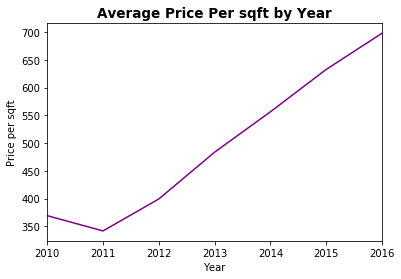

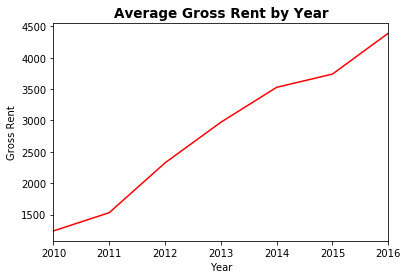

In [27]:
# Create a Title for the Dashboard

title_col = pn.pane.Markdown(
"""
# Real Estate Analysis of San Francisco from 2010 to 2016
""",
    width=800
)




# Create a tab layout for the dashboard

welcome_paragraph = pn.pane.Markdown(
"""
 This dashboard presents a visual analysis of historical price of house units, 
 sale price per square foot and gross rent in San Francisco, California from 2010 to 2016. 
 You can navigate through the tabs above to explore more details about the evolution 
 of the of the real estate market on The Golden City across these years.
"""
)

welcome_col = pn.Column(
    welcome_paragraph, 
    neighborhood_map()
)
neighborhood_analysis_col = pn.Column(
    average_price_by_neighborhood(),
    top_most_expensive_neighborhoods(),
    most_expensive_neighborhoods_rent_sales()
)

parallel_plots_analysis_col = pn.Column(
    parallel_categories(),
    parallel_coordinates
)

market_analysis_row = pn.Row(
   average_sales_price(),
   average_gross_rent()
)


tabs = pn.Tabs(
    
    ("Welcome", welcome_col),
    ("Neighborhood Analysis", neighborhood_analysis_col),
    ("Yearly Market Analysis", market_analysis_row),
    ("Parallel Plots Analysis",parallel_plots_analysis_col),
    ("Sunburst Plot Analysis", sunburst())
    
)

#Create the dashboard
final = pn.Column( pn.Row(title_col), tabs, width=900)
final
 

#possible resolve https://stackoverflow.com/questions/68148212/plotly-express-not-rendering-a-sunburst-chart

## Serve the Panel Dashboard

In [26]:
# Serve the# dashboard
#san_fran_dashboard.show()
final.show()

Launching server at http://localhost:53859


# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

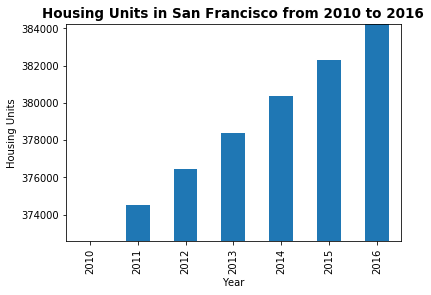

In [28]:
housing_units_per_year()

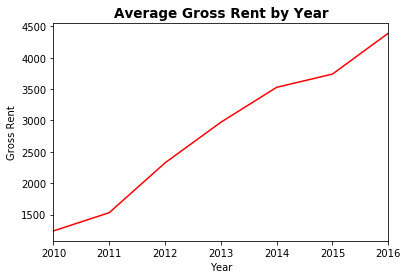

In [29]:
 average_gross_rent()

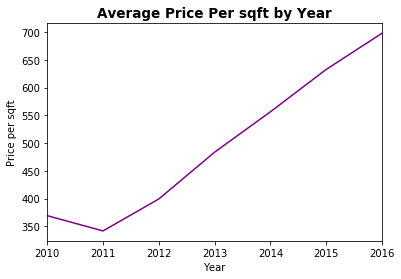

In [30]:
average_sales_price()

In [31]:
 average_price_by_neighborhood()

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [32]:
top_most_expensive_neighborhoods()

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [33]:
 most_expensive_neighborhoods_rent_sales()

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [41]:
neighborhood_map()

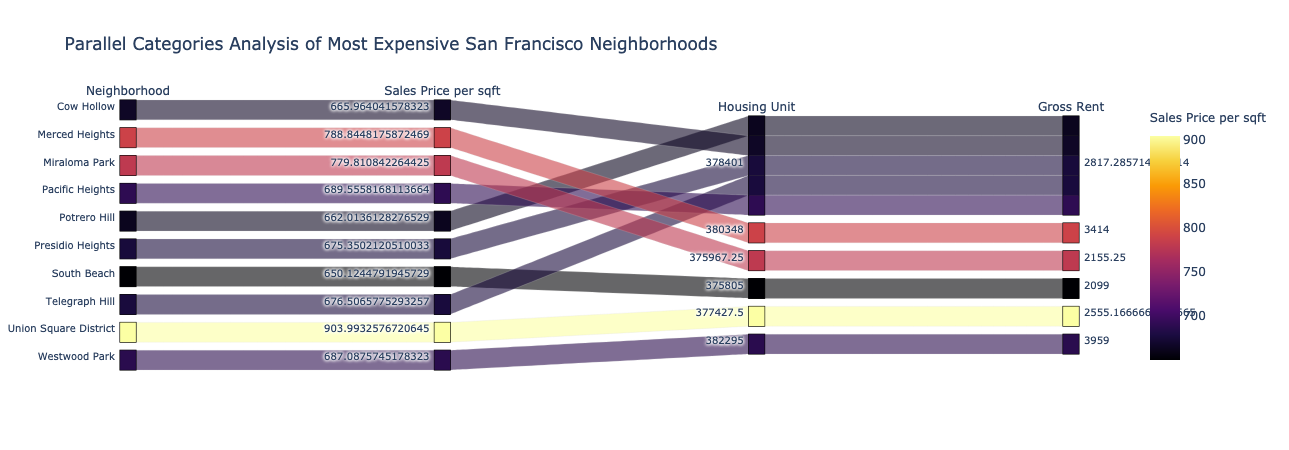

In [35]:
parallel_categories()

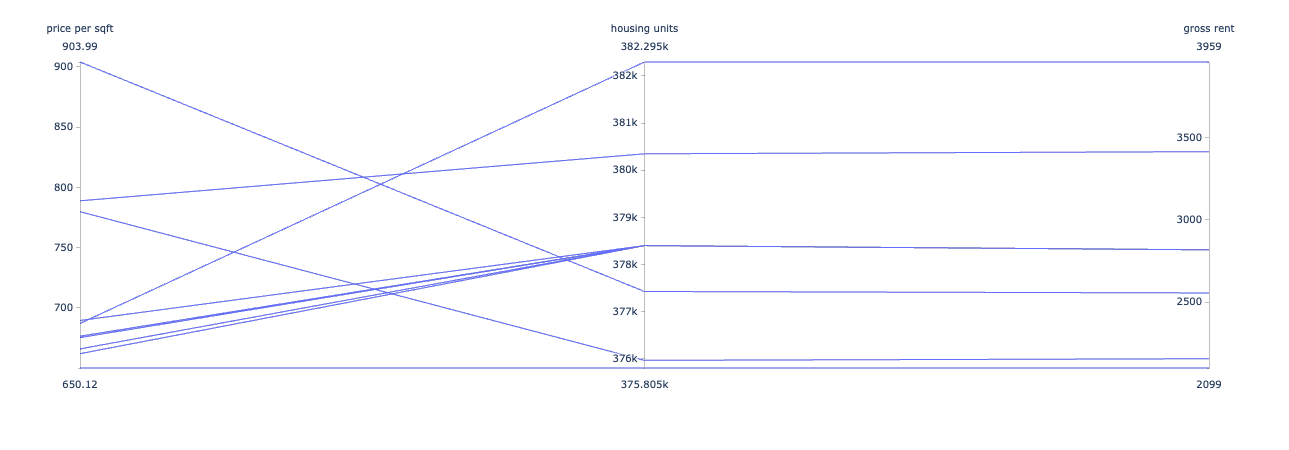

In [36]:
parallel_coordinates()

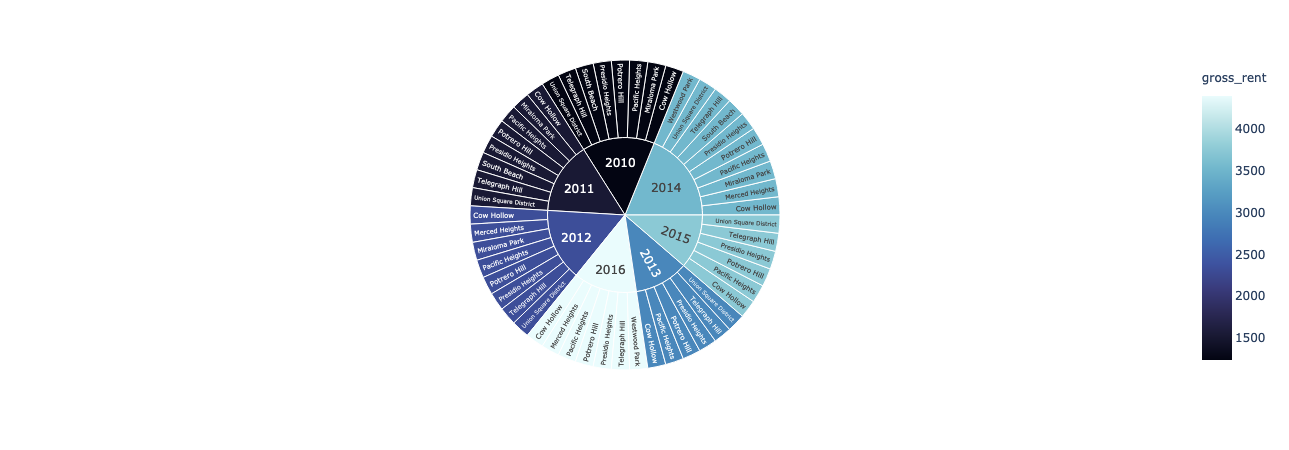

In [37]:
sunburst()